# PLOTS FOR PAPER

This notebook creates the plots for the paper. Figures are generated as PDFs in the directory cn.PLOT_DIR.

In [1]:
import pySubnetSB.constants as cn
from pySubnetSB.network import Network
from pySubnetSB.constraint_benchmark import ConstraintBenchmark

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tellurium as te
from typing import List, Optional, Union

# Data Preparation

In [2]:
STRONG_DF = pd.read_csv(cn.SUBNET_BIOMODELS_STRONG_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
STRONG_DF = STRONG_DF.reset_index()
WEAK_DF = pd.read_csv(cn.SUBNET_BIOMODELS_WEAK_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
WEAK_DF = WEAK_DF.reset_index()
SUMMARY_DF = pd.read_csv(cn.BIOMODELS_SUMMARY_PATH).sort_values(cn.D_MODEL_NAME)
SUMMARY_DF = SUMMARY_DF.reset_index()

In [3]:
STRONG_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,0,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","63242: 4 species, 3 reactions\n V_Pta: AcCoA ...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15,False,NaN,NaN,NaN,NaN,0.0,0.0
1,1,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","2006010: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6,False,NaN,NaN,NaN,NaN,0.0,0.0
2,2,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","9239969: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18,False,NaN,NaN,NaN,NaN,0.0,0.0
3,3,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","4369297: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24,False,0.0,0.0,0.0,0.0,0.0,0.0
4,4,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3434857: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60,False,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
WEAK_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,0,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","8615539: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,0.0,0.0,0.0,0.000000,0.000000
1,15,BIOMD0000000047,BIOMD0000000840,"BIOMD0000000047: 2 species, 3 reactions\n Jch...","6796498: 2 species, 3 reactions\n Vicodin_Use...","{""species_names"": {""CaER"": ""T"", ""Ca_Cyt"": ""A""}...",2.0,False,NaN,NaN,NaN,NaN,0.048439,0.049888
2,3,BIOMD0000000150,BIOMD0000000107,"BIOMD0000000150: 4 species, 2 reactions\n Bin...","4143730: 4 species, 2 reactions\n R3: cyclin ...","{""species_names"": {""CDK2cycA"": ""dimer"", ""Cycli...",4.0,False,NaN,NaN,NaN,NaN,0.200874,0.210010
3,2,BIOMD0000000150,BIOMD0000000524,"BIOMD0000000150: 4 species, 2 reactions\n Bin...","6466715: 4 species, 2 reactions\n reaction_3:...","{""species_names"": {""CDK2cycA"": ""DISCp55"", ""Cyc...",6.0,False,NaN,NaN,NaN,NaN,0.119040,0.124746
4,1,BIOMD0000000150,BIOMD0000000581,"BIOMD0000000150: 4 species, 2 reactions\n Bin...","6227409: 4 species, 2 reactions\n reaction_41...","{""species_names"": {""CDK2cycA"": ""species_21"", ""...",2.0,False,NaN,NaN,NaN,NaN,0.268005,0.279622


In [5]:
SUMMARY_DF.head

<bound method NDFrame.head of       index       model_name  num_reaction  num_species  trunceated_weak  \
0       879  BIOMD0000000001            17           12              NaN   
1       429  BIOMD0000000002            17           13              NaN   
2       914  BIOMD0000000003             7            3              0.0   
3       114  BIOMD0000000004             7            5              0.0   
4       519  BIOMD0000000005             9            9              0.0   
...     ...              ...           ...          ...              ...   
1066    510  BIOMD0000001056             5            3              0.0   
1067    660  BIOMD0000001057             5            2              0.0   
1068    380  BIOMD0000001058            20           10              NaN   
1069    431  BIOMD0000001059            21           10              NaN   
1070    663  BIOMD0000001060             7            2              0.0   

      truncated_strong  is_boundary_network  probability_

In [6]:
def makeMergeColumnName(column:str, is_reference:bool=True)->str:
    """
    Creates column names for merged result of subnet dataframe with summary dataframe.
    """
    if is_reference:
        suffix = "_reference"
    else:
        suffix = "_induced"
    return column + "_reference"

In [26]:
# Augment the subnet information with the reference num_reaction, num_species
def mergeWithSummary(subnet_df:pd.DataFrame=STRONG_DF)->pd.DataFrame:
    """
    Augment the subnet dataframe with summary information for reference network.
    """
    df = subnet_df.merge(SUMMARY_DF, right_on='model_name', left_on='reference_name',
                        suffixes=["_induced", "_reference"])
    # Clean up the DataFrame
    df = df.reset_index()
    del df['index']
    drops = df['reference_name'] == 'something'
    df = df[~drops]
    # Eliminate duplicate rows
    df['key'] = df['reference_name'] + "_" + df['target_name']  # key for an entry
    keys = list(df['key'])
    duplicate_keys = list(set([k for k in keys if keys.count(k) > 1]))
    for duplicate_key in duplicate_keys:
        duplicate_df = df [ df['key'] == duplicate_key]
        indices = list(duplicate_df.index)
        df = df.drop(indices[1:])
    # Final cleanup
    df = df.reset_index()
    return df
#
df = mergeWithSummary()
assert(len([c for c in df.columns if "_reference" in c]) > 0)
assert(len([c for c in df.columns if "_induced" in c]) > 0)
assert(len(df) <= len(STRONG_DF))
print("OK!")

OK!


In [28]:
STRONG_DF = mergeWithSummary(subnet_df=STRONG_DF)
WEAK_DF = mergeWithSummary(subnet_df=WEAK_DF)

## Check for duplicates

In [8]:
def checkSubnetDuplicates(subnet_df:pd.DataFrame, is_fix:bool=True)->pd.DataFrame:
    df = subnet_df.copy()
    keys = [r + "_" + t for r, t in zip(df[cn.FINDER_REFERENCE_NAME], df[cn.FINDER_TARGET_NAME])]
    df['key'] = keys
    count_dct = {k: keys.count(k) for k in keys}
    if len(keys) > len(set(keys)):
        for key in[k for k in set(keys) if count_dct[k] > 1]:
            if is_fix:
                sel = df['key'] == key
                idxs = df.index[sel]
                df = df.drop(idxs[:-1])
            print(key + "\n")
            print(df[df['key'] == key])
    else:
        print("No duplicates!")
    return df
        

In [9]:
print("*** WEAK")
WEAK_DF = checkSubnetDuplicates(WEAK_DF, is_fix=True)
checkSubnetDuplicates(WEAK_DF, is_fix=False)
#
print("\n***STRONG")
STRONG_DF = checkSubnetDuplicates(STRONG_DF, is_fix=True)
checkSubnetDuplicates(STRONG_DF, is_fix=False)

*** WEAK
No duplicates!
No duplicates!

***STRONG
No duplicates!
No duplicates!


,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak,key
0,0,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","63242: 4 species, 3 reactions\n V_Pta: AcCoA ...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15,False,NaN,NaN,NaN,NaN,0.000000,0.000000,BIOMD0000000006_BIOMD0000000067
1,1,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","2006010: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6,False,NaN,NaN,NaN,NaN,0.000000,0.000000,BIOMD0000000006_BIOMD0000000715
2,2,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","9239969: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18,False,NaN,NaN,NaN,NaN,0.000000,0.000000,BIOMD0000000006_BIOMD0000000848
3,3,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","4369297: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24,False,0.0,0.0,0.0,0.0,0.000000,0.000000,BIOMD0000000027_BIOMD0000000170
4,4,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3434857: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60,False,0.0,0.0,0.0,0.0,0.000000,0.000000,BIOMD0000000027_BIOMD0000000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1207,BIOMD0000001048,BIOMD0000001059,"BIOMD0000001048: 3 species, 6 reactions\n mig...","9114784: 3 species, 6 reactions\n cleavage_of...","{""species_names"": {""Ttum"": ""pc3"", ""Tplas"": ""c3...",4,False,0.0,0.0,0.0,0.0,0.000000,0.000000,BIOMD0000001048_BIOMD0000001059
1208,1208,BIOMD0000001056,BIOMD0000000294,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","5701070: 3 species, 5 reactions\n r2: -> V\n...","{""species_names"": {""C1"": ""V"", ""C2"": ""S"", ""C3"":...",2,False,0.0,0.0,0.0,0.0,0.000416,0.000624,BIOMD0000001056_BIOMD0000000294
1209,1209,BIOMD0000001056,BIOMD0000000810,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","2698864: 3 species, 5 reactions\n growth_of_C...","{""species_names"": {""C1"": ""Cancer_Stem_Cells_S""...",9,False,0.0,0.0,0.0,0.0,0.000848,0.001271,BIOMD0000001056_BIOMD0000000810
1210,1210,BIOMD0000001056,BIOMD0000000852,"BIOMD0000001056: 3 species, 5 reactions\n Pro...","9404313: 3 species, 5 reactions\n HSC_Self_Re...","{""species_names"": {""C1"": ""x0"", ""C2"": ""y0"", ""C3...",1,False,0.0,0.0,0.0,0.0,0.000240,0.000360,BIOMD0000001056_BIOMD0000000852


# Helpers

In [10]:
def makeTestDataFrame():
    df = pd.DataFrame({'reference_name': [0, 1, 1, 2, 2, 2], 'target_name': [0, 1, 1, 2, 2, 2]})
    return df.astype(str)
TEST_NUM_DUPLICATE = 5

In [11]:
def makeAntimony(model_name:str, is_reference:bool=True, subnet_df:pd.DataFrame=STRONG_DF, is_roadrunner_loadable:bool=False):
    """
    Transforms the string in a "network" cell into an antimony model
    """
    if is_reference:
        name_col = 'reference_name'
        network_col = 'reference_network'
    else:
        name_col = 'target_name'
        network_col = 'induced_network'
    models =  subnet_df[subnet_df[name_col] == model_name][network_col].values
    if len(models) == 0:
        return None
    model = models[0]
    if is_roadrunner_loadable:
        pos = model.index('tions\n')
        model = model[pos+7:]
        model = model.replace('\n', ';1\n')
        model += ";1;"
    return model

# TESTS
model = makeAntimony('BIOMD0000000224', is_roadrunner_loadable=True)
rr = te.loada(model)
model = makeAntimony('BIOMD0000000030')
assert(model is None)
print("OK!")

OK!


In [12]:
def extractBiomodelNum(stg:str)->int:
    """
    Extracts the number from the biomodels name.
    """
    substg = stg[5:]
    pos = np.min([n if c != '0' else 1000 for n, c in enumerate(substg)])
    try:
        result = int(substg[pos:])
    except:
        result = None
    return result

# TESTS
num = extractBiomodelNum('BIOMD0000000030')
assert(num == 30)
num = extractBiomodelNum('BIOMD0000002030')
assert(num == 2030)
print("OK!")

OK!


In [13]:
def checkDuplicates(df:pd.DataFrame, is_print:bool=True)->list:
    """
    Checks if elements are duplicated
    """
    keys = list(df['reference_name'] + df['target_name'])
    duplicates = []
    if len(keys) > len(set(keys)):
        duplicates = [k for k in keys if keys.count(k) > 1]
        if is_print:
            print(f"**Duplicate entries: {duplicates}")
    else:
        if is_print:
            print("**No duplicate entries")
    return duplicates

count = len(checkDuplicates(makeTestDataFrame(), is_print=False))
assert(count == TEST_NUM_DUPLICATE)
print("OK!")

OK!


In [14]:
def removeDuplicates(df:pd.DataFrame)->pd.DataFrame:
    """
    Remove rows where the reference_name + target_name is duplicated.

    Args:
        df: dataframe procesed

    Returns:
        DataFrame w/o duplicates
    """
    keys = np.array(df['reference_name'].astype(str) + df['target_name'].astype(str))
    all_positions = np.array(range(len(keys)))
    drop_idxs = []
    for key in set(keys):
        key_positions = all_positions[keys == key]
        drop_idxs.extend(key_positions[:-1])
    result_df = df.drop(drop_idxs)
    return result_df

# TESTS
df = makeTestDataFrame()
result_df = removeDuplicates(df)
assert(len(result_df) == 3)
print("OK!")   

OK!


In [15]:
def getTargetNames(reference_name:str, subnet_df:pd.DataFrame=STRONG_DF)->List[str]:
    """
    Gets the list of target names for the reference, if any.

    Args:
       reference_name: str

    Returns:
       list-str
    """
    sel = subnet_df["reference_name"] == reference_name
    if np.sum(sel) == 0:
        return None
    target_names = subnet_df[sel]["target_name"].values
    return target_names

# Tests
names = getTargetNames("BIOMD0000000224")
assert(len(names) > 0)
names = getTargetNames("BIOMD000000022x")
assert(names is None)
print("OK!")

OK!


In [16]:
def calculateLog10Probability(prob:Union[float, np.ndarray], min_prob=1e-5)->np.ndarray:
    """
    Calculates -Log10 of probabilities
    """
    if isinstance(prob, float) or isinstance(prob, int):
        new_prob = max(prob, min_prob)
    else:
        new_prob = np.array([max(v, min_prob) for v in prob])
    return -np.log10(new_prob)
        

# Tess
result = calculateLog10Probability(0.4)
result = calculateLog10Probability(0)
assert(result == 5)
#
result = calculateLog10Probability([0.5, 0])
assert(result[1] == 5)
print("OK!")

OK!


# Scalable Subnet Discovery

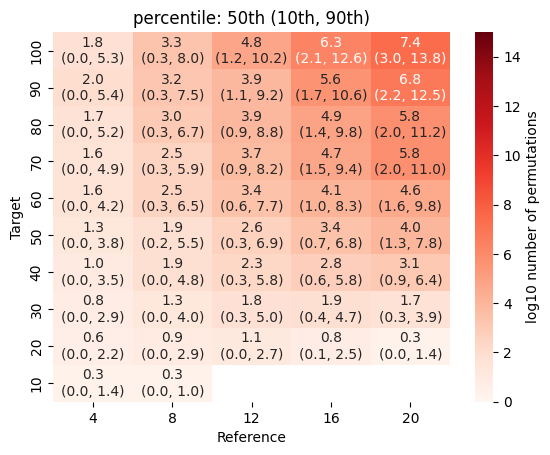

In [17]:
# Number of assignments for different sizes of reference and target networks
df = ConstraintBenchmark.plotHeatmap(range(4, 24, 4), range(10, 110, 10), percentile=50,
                                        num_iteration=300)

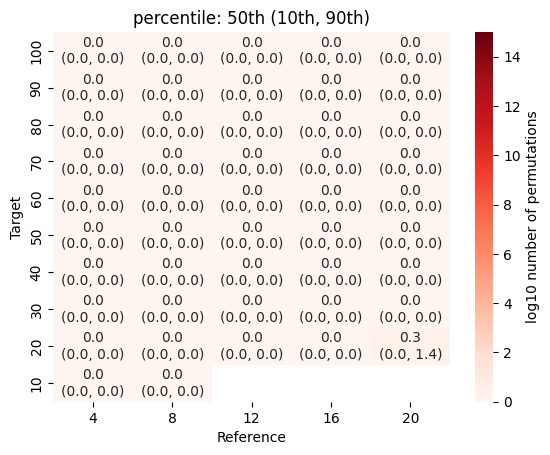

In [18]:
# The target does not contain the reference
df = ConstraintBenchmark.plotHeatmap(range(4, 24, 4), range(10, 110, 10), percentile=50, is_contains_reference=False,
                                        num_iteration=300)

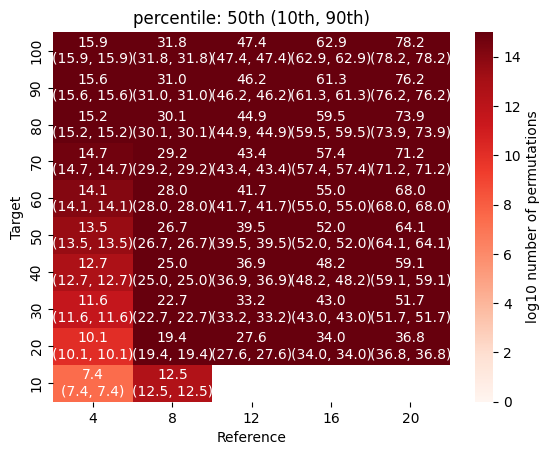

In [19]:
# No constraints
df = ConstraintBenchmark.plotHeatmap(range(4, 24, 4), range(10, 110, 10), percentile=50, is_contains_reference=False,
          is_no_constraint=True, num_iteration=1)

# Statistical significance of a network

Calculation of the POC of networks with weak and strong identity to the BioModels reference networks (those with number reactions <= 10)

In [20]:
def plotModelPOC(is_strong:bool=True, is_plot:bool=True):
    if is_strong:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_STRONG
        adjective = 'Strong'
    else:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_WEAK
        adjective = 'Weak'
    pivot_df = SUMMARY_DF.pivot_table(values=column,
                    index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES, aggfunc='median')
    pivot_df = pivot_df.map(lambda x: calculateLog10Probability(x))
    pivot_df.sort_index(level=0, ascending=False, inplace=True)
    if is_plot:
        sns.heatmap(pivot_df, annot=True, fmt="1.1f", cmap="coolwarm", vmin=0, vmax=5,
              annot_kws={'size': 8},
              cbar_kws={'label': '-log10 Probability of occurrence'})
        #plt.title(f"{adjective} Identity")
        plt.xlabel("number of species")
        plt.ylabel("number of reactions")
# Test
plotModelPOC(is_strong=True, is_plot=False)
print("OK!")

OK!


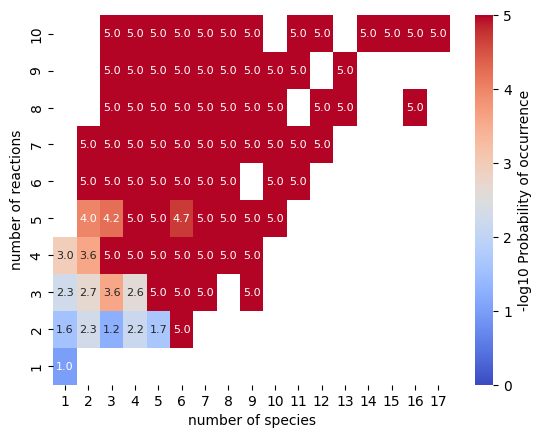

In [21]:
plotModelPOC(is_strong=True)
path = os.path.join(cn.PLOT_DIR, "strong_identity_significance_reference_networks.pdf")
plt.savefig(path)
# Little difference between strong and weak identity
#plt.figure()
#plotModelPOC(is_strong=False)

# Subnet Discovery in BioModels

In [29]:
def heatmapCount(induced_df, title:str="", is_plot:bool=True, is_count:bool=True,
        network_column=cn.FINDER_REFERENCE_NAME, vmax:int=-1):
    """
    Counts occurrences of reference networks in induced_df or the number of induced networks.
    Args:
        is_count (bool): count distinct values of network_count; if False, calculate ratio of all occurrences to distinct
    """
    # Calculate count of networks
    count_df = induced_df.copy()
    count_df = count_df[[network_column, cn.D_NUM_SPECIES, cn.D_NUM_REACTION]]
    count_df = count_df.drop_duplicates()
    #
    if is_count:
        # Count sizes of reference networks
        plot_df = count_df
        bar_label = 'count'
        fmt="1.0f"
        if vmax < 0:
            vmax = 10
    else:
        # Count occurrence of induced networks
        plot_df = induced_df
        bar_label = 'ratio'
        fmt="1.1f"
        if vmax < 0:
            vmax = 100
    network_ser = count_df.groupby([cn.D_NUM_SPECIES, cn.D_NUM_REACTION]).count()[network_column]
    induced_ser = induced_df.groupby([cn.D_NUM_SPECIES, cn.D_NUM_REACTION]).count()[network_column]
    if is_count:
        plot_ser = network_ser
    else:
        plot_ser = induced_ser/network_ser
    num_species = [x[0] for x in network_ser.index]
    num_reactions = [x[1] for x in network_ser.index]
    df = pd.DataFrame({cn.D_NUM_SPECIES: num_species, cn.D_NUM_REACTION: num_reactions, 'count': plot_ser.values})
    pivot_df = df.pivot_table(values='count', index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES)
    pivot_df.sort_index(level=0, ascending=False, inplace=True)
    if is_plot:
        sns.heatmap(pivot_df, annot=True, fmt=fmt, cmap="coolwarm", vmin=0, vmax=vmax,
              annot_kws={'size': 8},
              cbar_kws={'label': bar_label})
        plt.title(title)
        plt.xlabel("number species")
        plt.ylabel("number reactions")
# Test
heatmapCount(STRONG_DF, title="", is_plot=False, is_count=True)
print("OK!")

OK!


## Reference networks that induce networks

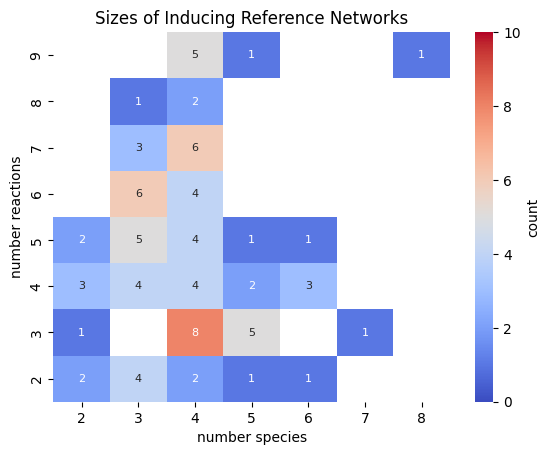

In [31]:
heatmapCount(STRONG_DF, title="Sizes of Inducing Reference Networks", is_plot=True, network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "all_reference_network_count.pdf")
plt.savefig(path)

In [32]:
constrained_strong_df = STRONG_DF.copy()
# Remove small reference networks
sel = [s > 3 and r > 3 for s, r in zip(constrained_strong_df[cn.D_NUM_SPECIES], constrained_strong_df[cn.D_NUM_REACTION])]
CONSTRAINED_STRONG_DF = constrained_strong_df[sel]

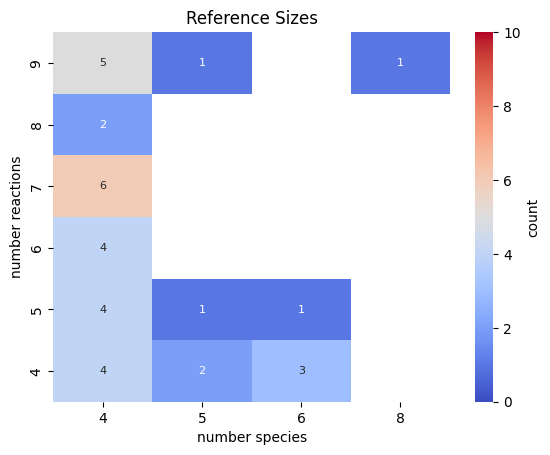

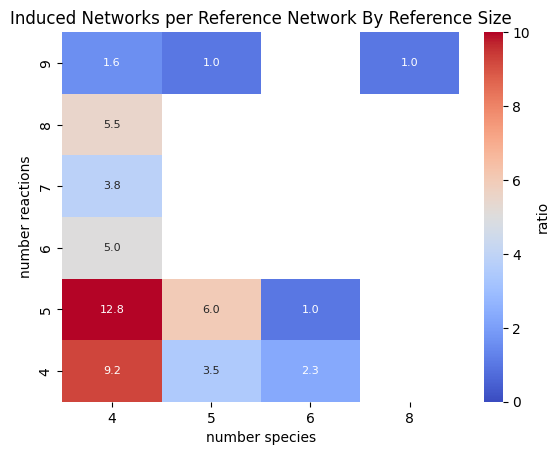

In [33]:
heatmapCount(CONSTRAINED_STRONG_DF, title="Reference Sizes", is_plot=True, network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "reference_network_count.pdf")
plt.savefig(path)
plt.figure()
heatmapCount(CONSTRAINED_STRONG_DF, title="Induced Networks per Reference Network By Reference Size",
             network_column=cn.FINDER_REFERENCE_NETWORK,
             is_count=False, vmax=10,
             is_plot=True)
path = os.path.join(cn.PLOT_DIR, "induced_network_reference.pdf")
plt.savefig(path)

In [ ]:
print(f"Number of distinct reference models: {len(set(STRONG_DF[cn.FINDER_REFERENCE_NAME]))}")
print(f"Number of : {len(set(STRONG_DF[cn.FINDER_REFERENCE_NAME]))}")

In [ ]:
if False:
    heatmapPOC(STRONG_DF, 'probability_of_occurrence_strong_induced', title="Strong, Induced, POC", is_plot=True)
    plt.figure()
    heatmapPOC(WEAK_DF, 'probability_of_occurrence_strong_induced', title="Weak, Induced, POC", is_plot=True)

## Target networks with induced networks

In [ ]:
strong_df = CONSTRAINED_STRONG_DF[[cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME]]
strong_df = strong_df.merge(SUMMARY_DF, right_on='model_name', left_on='target_name')
strong_df = strong_df[[cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME, cn.D_NUM_REACTION, cn.D_NUM_SPECIES]]
strong_df

In [ ]:
heatmapCount(strong_df, title="Target Sizes", is_plot=True, network_column=cn.FINDER_TARGET_NAME,
             is_count=True)
path = os.path.join(cn.PLOT_DIR, "target_network_count.pdf")
plt.savefig(path)
plt.figure()
heatmapCount(strong_df, title="Induced Networks per Target Network By Target Size", network_column=cn.FINDER_TARGET_NAME,
             is_count=False, vmax=10,
             is_plot=True)
path = os.path.join(cn.PLOT_DIR, "induced_network_target.pdf")
plt.savefig(path)

# Analysis

In [ ]:
# Scatter plot of subnets
xvals = [extractBiomodelNum(m) for m in STRONG_DF['reference_name']]
yvals = [extractBiomodelNum(m) for m in STRONG_DF['target_name']]
plt.scatter(xvals, yvals)
#plt.xlim([0, 300])
#plt.ylim([0, 300])
plt.plot([0,1000], [0, 1000], c='red')

Above the red line are target odels that embed an existing reference model. Below the red line indicate common motif without reuse. The dots below indicate opportunities for reuse.

In [ ]:
print(makeAntimony('BIOMD0000000150'))

In [ ]:
# Print all of the reference models that appear in targets
names = list(set(CONSTRAINED_STRONG_DF[cn.FINDER_REFERENCE_NAME]))
names.sort()
print(f"Number of distinct networks: {len(names)}\n")
for name in names:
    result = makeAntimony(name)
    if result is not None:
        print(result + '\n\n')

# Notes

1. BioModels w/o significance
   1. Basic scatter
   2. Most induced reference and what it is
1. Significance evaluation
   1. Heat map.
   2. Little difference between weak and strong identity in terms of significance levels. How about subnets?
   3. Approximate significance with model size.
1. BioModels with significance
    1. Interesting reference models and where reused
        1. Double phos
        2. SIR
        3. MERK model
    1. Interesting targets -- lots of reference
1. Oscillator